In [ ]:
# 군집분석 역시 비지도 학습. 답안지를 따로 두지 않고 데이터를 군집화한다.

## 군집
* 각 군집화 기법은 나름의 장단점을 가지고 있으며 군집화하려는 데이터의 특성에 맞게 수행해야 함
* K-평균
    - 거리 기반으로 군집 중심점을 이동시키면서 군집화를 수행.
    - 매우 직관적인 알고리즘으로 많은 군집화 애플리케이션에 애용되지만 복잡한 구조를 가지는 데이터세트에 적용하기에는 한계가 있음.
    - 평가는 실루엣 계수를 이용  
* 평균이동(Mean Shift)
    - K-평균과 유사하나 거리 중심이 아니고 데이터가 모여있는 밀도가 가장 높은 쪽으로 군집 중심점을 이동하면서 군집화를 수행.
    - 컴퓨터 비전 영역에서 이미지나 영상 데이터의 특정 개체 구분에 적합한 알고리즘  
* GMM(Gausian Mixture Model)
    - 군집화를 적용하고자 하는 데이터를 여러 개의 [가우시안 분포 모델
    (대표적으로 '표준 정규 분포')]을 섞어서 생성된 모델로 가정해 수행하는 방식.
    - K-평균 보다 유연하고 다양한 데이터 세트에 잘 적용될 수 있으나 수행 시간이 오래 걸림  
* DBSCAN(Density Based Spatial Clustering of Applications with Noise)
    - 밀도 기반 군집화의 대표적인 알고리즘으로 데이터의 분포가 기하학적으로 복잡한 데이터 세트에 효과적인 군집화가 가능함


In [4]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, seaborn as sns
import pandas as pd, numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
# 이건 비교적 단순한 데이터이므로 굳이 스케일링 하지 않고 진행하겠음
ir = load_iris()
iris = pd.DataFrame(ir.data, columns=ir.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
# 군집 개수 3개, 초기 중심 설정 방식은 k-means++(기본값임)
# 군집 이동 최대 반복 횟수 max_iter
kmeans = KMeans(n_clusters=3, init='k-means++',
                max_iter=300, random_state=0)
kmeans.fit(iris)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [12]:
iris['target'] = ir.target # 실제 품종 구분
iris['cluster'] = kmeans.labels_ # 군집화로 라벨링한 결과물
result = iris.groupby(['target','cluster'])['sepal length (cm)'].count()
result

# 타겟 0 = 군집 1
# 타겟 1 = 군집 0
# 타겟 2 = 군집 2를 의도했으나 군집 0과 혼재

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal length (cm), dtype: int64

In [33]:
# 2차원 평면에 시각화하기 위해 4개 속성을 2개의 차원으로 축소
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# 그래도 안 하면 섭섭하니까 스케일 해볼까?
p = pca.fit_transform(scale(ir.data))
iris['pca1'] = p[:,0]
iris['pca2'] = p[:,1]
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,pca1,pca2
0,5.1,3.5,1.4,0.2,0,1,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,1,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,1,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,0,1,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,0,1,-2.389842,0.646835


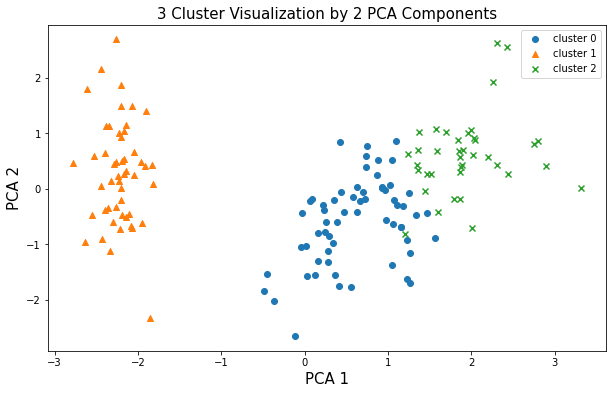

In [31]:
# 군집별로 시각화하기 위해 군집별로 인덱스 추출
c0 = iris[iris.cluster==0].index
c1 = iris[iris.cluster==1].index
c2 = iris[iris.cluster==2].index

# 해당 인덱스 기반 x 좌표 pca1, y 좌표 pca2로 산점도 표현
plt.figure(figsize=(10,6))
plt.scatter(x=iris.loc[c0, 'pca1'], y = iris.loc[c0, 'pca2'], label='cluster 0', marker='o')
plt.scatter(x=iris.loc[c1, 'pca1'], y = iris.loc[c1, 'pca2'], label='cluster 1',marker='^')
plt.scatter(x=iris.loc[c2, 'pca1'], y = iris.loc[c2, 'pca2'], label='cluster 2',marker='x')
plt.legend()
plt.xlabel('PCA 1', fontsize=15)
plt.ylabel('PCA 2', fontsize=15)
plt.title('3 Cluster Visualization by 2 PCA Components', fontsize=15)
plt.show()
# 스케일링 하면 군집이 좀 더 깔끔하게 나뉜다.

In [34]:
# 사실 군집은 뭘 기준으로 할지 우리가 바로 알 수는 없고
# 계층적 방법을 먼저 수행해서 적합한 클러스터의 개수를 파악한다(실루엣 계수 평가 등)

## 군집 평가 
- 실루엣 분석으로 평가, 이를 위해 metrics 모듈의 silhouette_samples, silhouette_score을 이용

- 대부분의 군집화 데이터 세트는 타겟 레이블을 가지고 있지 않다.(비지도학습)
- 비지도 학습의 특성상 정확하게 성능을 평가하기 어렵지만 군집화의 성능을 평가하는 방법으로 실루엣 분석 이용
- 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는 지를 나타냄. 
- 효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미
- 실루엣 계수는 -1에서 1사이의 값을 가지며 1로 가까워질수록 근처의 군집과 멀리 떨어져 있다는 것이고 0에 가까울수록 근처의 군집과 가까워진다는 것임.
 - 실루엣 계수 : $s(i) = \frac{b(i) - a(i)}{max(a(i),b(i))}$
   - 해석법: 군집간 거리는 멀고, 군집내 거리는 가까울수록 실루엣 계수는 1에 가깝다.
   - $a(i)$ : 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값
   - $b(i)$ : 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리 
   - 음의 값(-)은 아예 다른 군집에 데이터 포인트가 할당되었음을 의미
- silhouette_samples : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해 주면 각 데이터 포인트의 실루엣 계수를 반환
- silhouette_score : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해 주면 전체 데이터의 실루엣 계수 값을 평균해 반환. 즉 np.mean(silhouette_samples())과 같음. 이 값이 높을수록 군집화가 잘 됐다고 판단할 수 있지만 무조건 높다고 해서 군집화가 잘되었다고는 할 수 없다.
 - 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함  
 (평균 편차가 커 버리면 각 군집의 실루엣 계수간의 차이가 심하다는 말임. '일관적이지가 않다'는 것이다. 평균값만 볼 게 아니라 개별 실루엣 계수간의 차이가 크지 않고 균일해야 좋은 군집화.)


In [36]:
from sklearn.metrics import silhouette_samples, silhouette_score

iris = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,
               random_state=0).fit(iris)
iris['cluster'] = kmeans.labels_

In [39]:
score_samples = silhouette_samples(load_iris().data, iris.cluster)
print(len(iris), score_samples.shape)
# 각 행에 대한 개별 실루엣 계수를 모두 구했음

150 (150,)


In [42]:
iris['silhouette'] = score_samples
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,silhouette
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302


In [41]:
score_all = silhouette_score(load_iris().data, iris.cluster)
print(f'전체 실루엣 계수: {score_all:.4f}')

전체 실루엣 계수: 0.5528


In [43]:
iris.groupby('cluster')['silhouette'].mean()
# 군집 간 평균의 편차가 제법 있음.

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette, dtype: float64

In [45]:
# 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

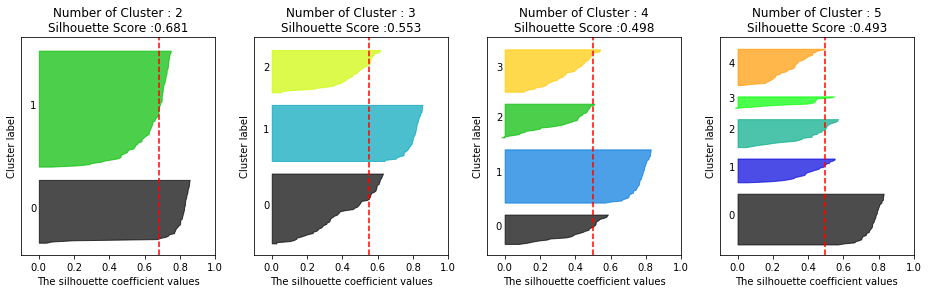

In [47]:
visualize_silhouette([2,3,4,5], load_iris().data)